# <span style="color:cyan"> Ejercicio 1: Preprocesamiento

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10, 6)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [33]:
# df train
df_train = pd.read_csv('churn_train.csv').drop('Unnamed: 0', axis=1)

# df test
df_test = pd.read_csv('churn_test.csv').drop('Unnamed: 0', axis=1)

In [34]:
df_train.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [37]:
df_test.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no


In [35]:
df_train.shape

(3333, 20)

In [36]:
df_test.shape

(1667, 20)

In [5]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [38]:
df_test.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
df_train.isnull().value_counts()

state  account_length  area_code  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls  churn
False  False           False      False               False            False                  False              False            False             False              False            False             False                False              False               False               False             False              False                          False    3333
dtype: int64

### Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.

In [7]:
def plot_describe_variables(df, rows, cols):
    for index, (colname, serie) in enumerate(df.items()):
        plt.subplot(rows, cols, index + 1)
        if serie.dtype == 'object':
            sns.countplot(x=serie)
            plt.axhline(serie.value_counts().mean())
            plt.xlabel('')
            plt.title(colname)
        else:
            sns.distplot(serie)
            plt.axvline(np.mean(serie))
            plt.xlabel('')
            plt.title(colname)
    plt.tight_layout()

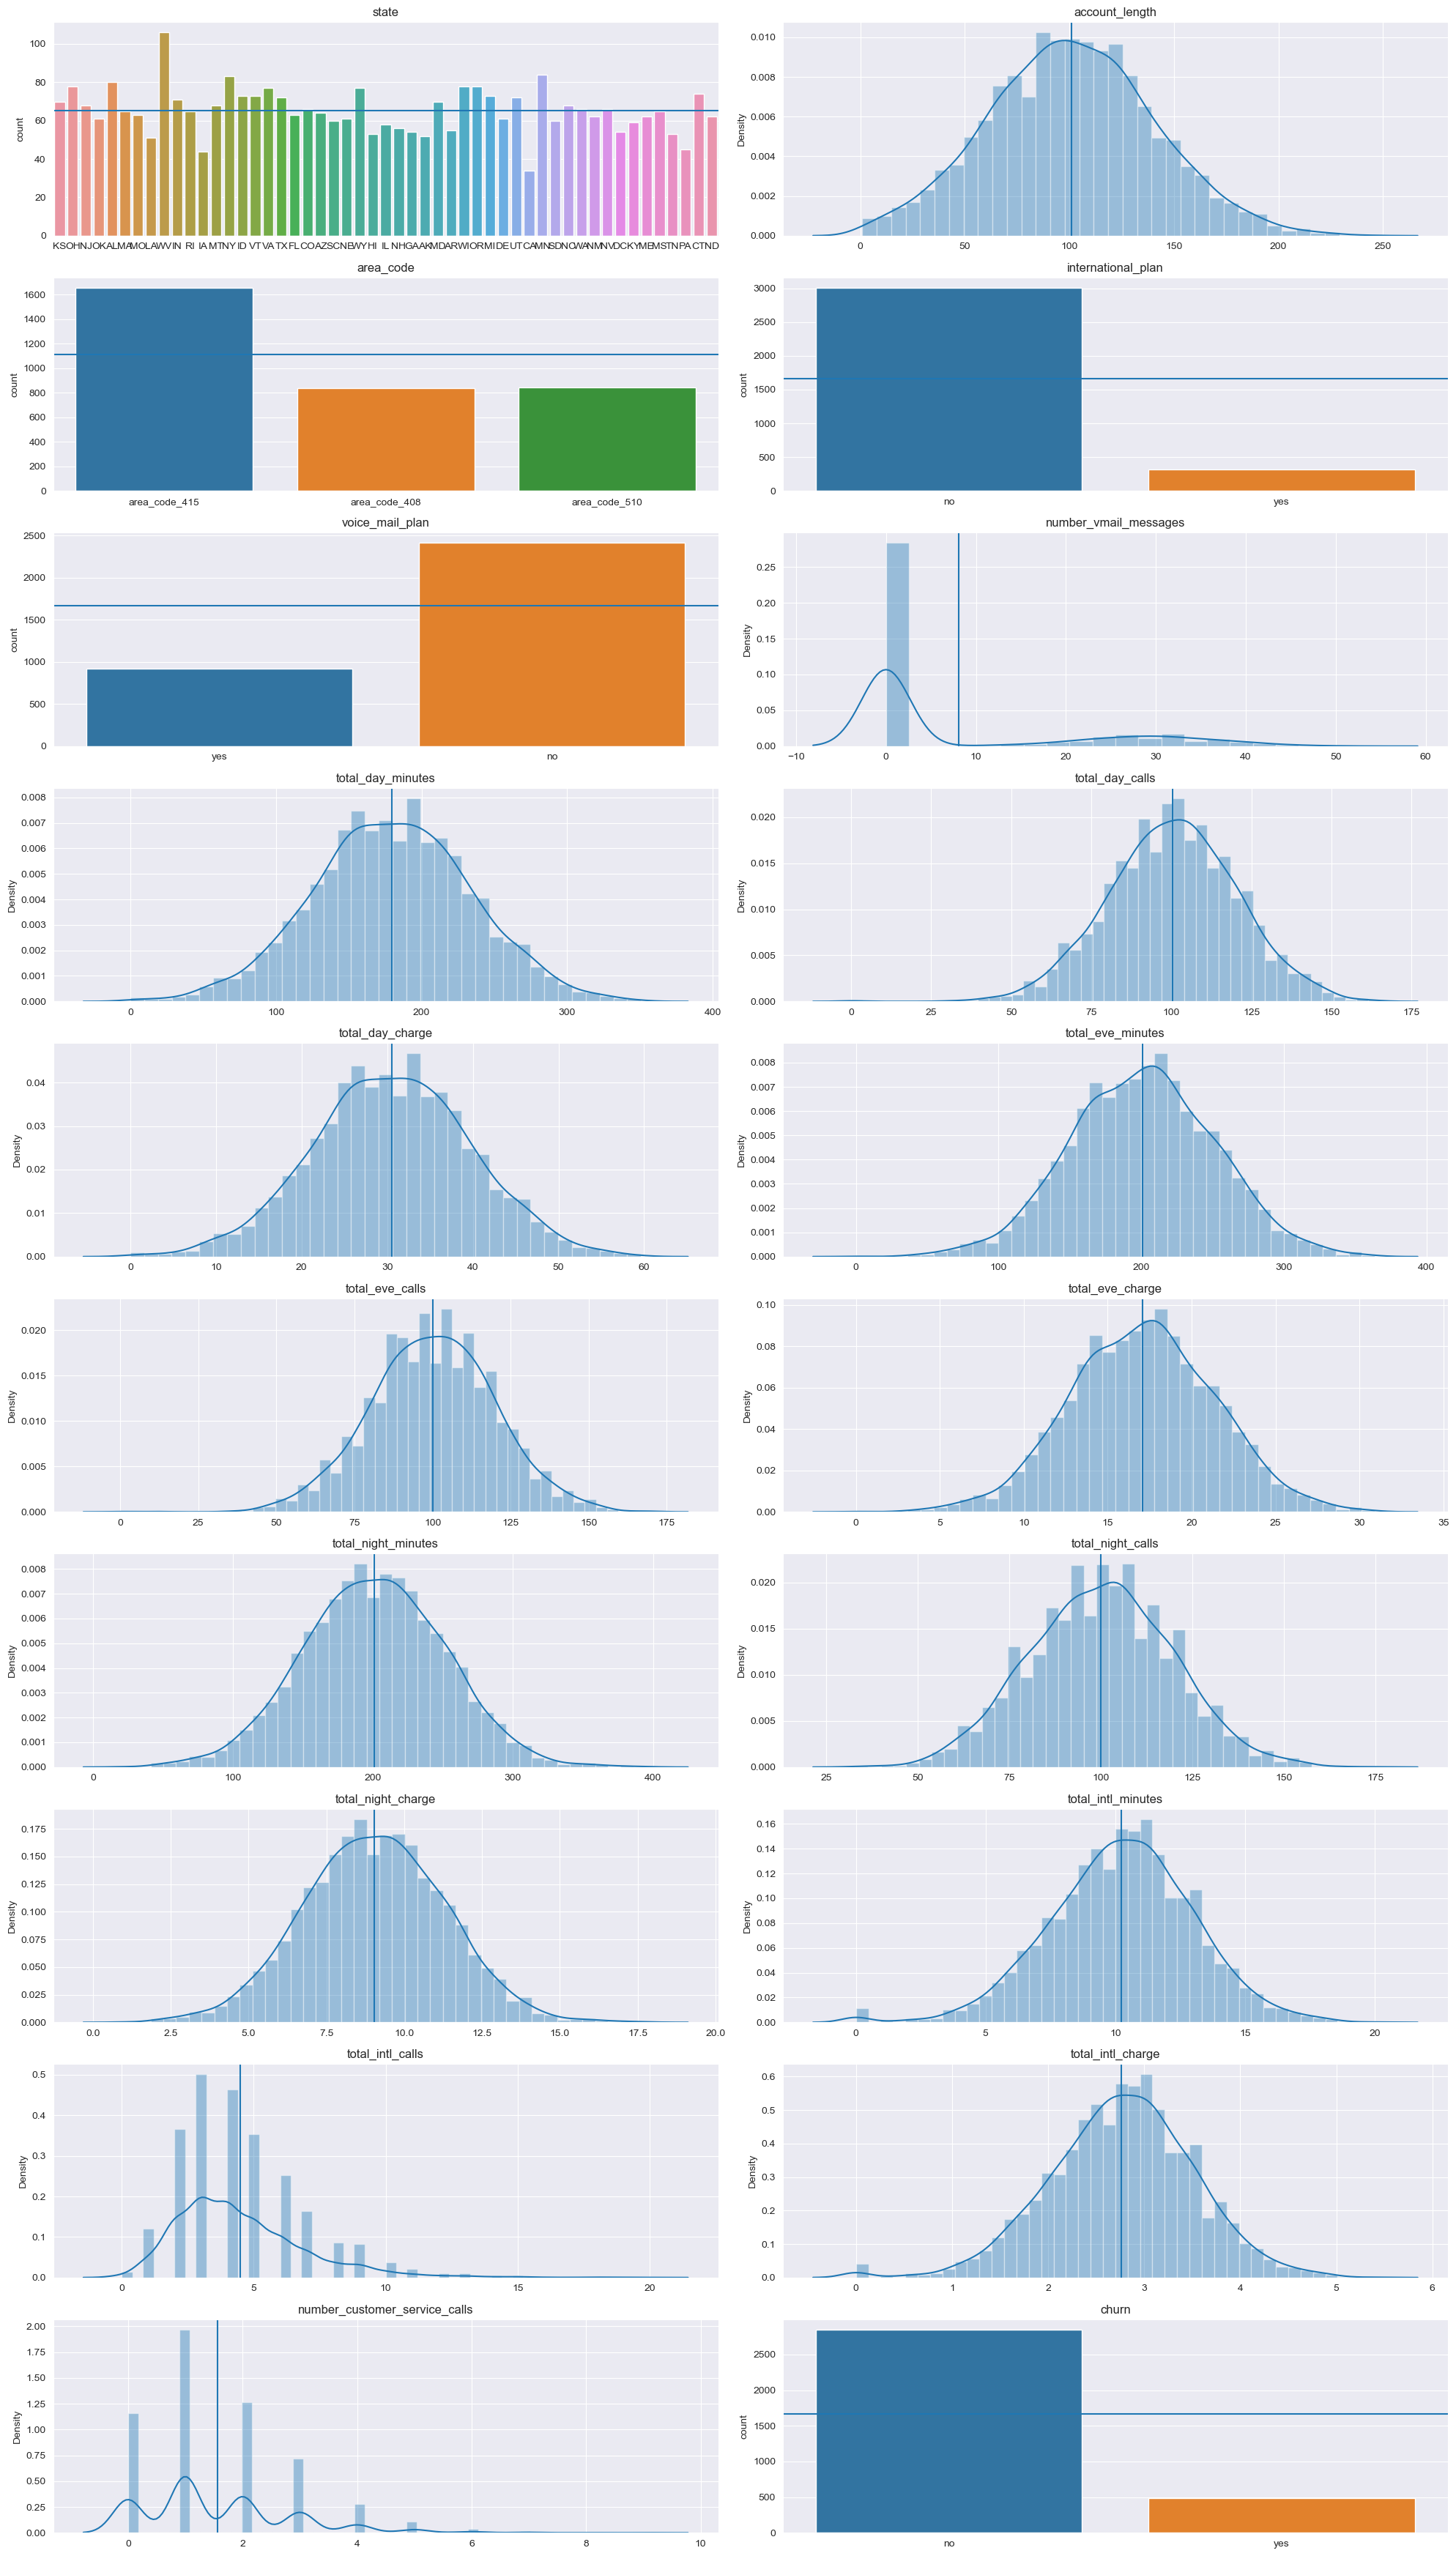

In [8]:
# definimos el dimensionado de nuestra grilla
rows= 10
cols = 2
plt.figure(figsize=(20,35))
plot_describe_variables(df_train, rows=rows, cols=cols)

In [9]:
df_train['churn'].value_counts('%')

no     0.855086
yes    0.144914
Name: churn, dtype: float64

    La mayoría de los atributos numéricos presentan una distribución similar a la normal. Aquellos que difieren son 'number_vmail_messages', 'total_intl_calls' y 'number_customer_service_calls'.
    Respecto a la variables categóricas, la única que presenta valores balanceados es 'state'.
    El vector objetivo presenta valores muy desbalanceados. El 14% de los clientes se cambiaron de compañia.


### En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo.

### <span style="color:orange">  Recodificación df_train

In [10]:
# variables tipo 'object'
var_obj =  ['area_code', 'international_plan', 'voice_mail_plan', 'churn']

for col in var_obj:
    print(df_train[col].unique())

['area_code_415' 'area_code_408' 'area_code_510']
['no' 'yes']
['yes' 'no']
['no' 'yes']


In [11]:
df_states_pre = df_train.state
df_states_pre

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: state, Length: 3333, dtype: object

In [12]:
# recodificacón variables
df_train[['churn', 'international_plan', 'voice_mail_plan']] = df_train[['churn', 'international_plan', 'voice_mail_plan']].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df_train['state'] = LabelEncoder().fit_transform(df_train['state'])
df_dummies = pd.get_dummies(df_train['area_code'], drop_first=True)

In [13]:
# concatenación variables con dataframe
df_train = pd.concat([df_train.drop(['area_code'], axis=1), df_dummies], axis=1)
df_train

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_415,area_code_510
0,16,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,36,156.2,77,26.55,215.5,126,...,279.1,83,12.56,9.9,6,2.67,2,0,1,0
3329,49,68,0,0,0,231.1,57,39.29,153.4,55,...,191.3,123,8.61,9.6,4,2.59,3,0,1,0
3330,39,28,0,0,0,180.8,109,30.74,288.8,58,...,191.9,91,8.64,14.1,6,3.81,2,0,0,1
3331,6,184,1,0,0,213.8,105,36.35,159.6,84,...,139.2,137,6.26,5.0,10,1.35,2,0,0,1


In [14]:
df_train.columns

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn',
       'area_code_415', 'area_code_510'],
      dtype='object')

### <span style="color:orange">  Recodificación df_test

In [15]:
# recodificacón variables
df_test[['churn', 'international_plan', 'voice_mail_plan']] = df_test[['churn', 'international_plan', 'voice_mail_plan']].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df_test['state'] = LabelEncoder().fit_transform(df_test['state'])
df_dummies = pd.get_dummies(df_test['area_code'], drop_first=True)

In [16]:
# concatenación variables con dataframe
df_test = pd.concat([df_test.drop(['area_code'], axis=1), df_dummies], axis=1)
df_test.head(3)

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_415,area_code_510
0,11,101,0,0,0,70.9,123,12.05,211.9,73,...,236.0,73,10.62,10.6,3,2.86,3,0,0,1
1,26,137,0,0,0,223.6,86,38.01,244.8,139,...,94.2,81,4.24,9.5,7,2.57,0,0,0,1
2,35,103,0,1,29,294.7,95,50.10,237.3,105,...,300.3,127,13.51,13.7,6,3.70,1,0,0,0


# <span style="color:cyan"> Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [18]:
# matriz de atributos
X = df_train.drop('churn', axis=1)

# vector objetivo
y = df_train['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=94)

### <span style="color:orange">  AdaBoost

In [19]:
# grillas de hiperparámetros
grid_adaboost = {
    'learning_rate': [0.01, 0.1, 0.5], 
    'n_estimators': [50, 100, 500, 1000, 2000]
    }

ada_boost_cv = GridSearchCV(AdaBoostClassifier(random_state=94),
                                param_grid = grid_adaboost,
                                cv=5,
                                n_jobs=-1).fit(X_train, y_train)

ada_boost_cv.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=94)

In [20]:
best_ada_boost = ada_boost_cv.best_estimator_
best_ada_boost_yhat = best_ada_boost.predict(X_test)
print(classification_report(y_test, best_ada_boost_yhat))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       952
           1       0.51      0.29      0.37       148

    accuracy                           0.87      1100
   macro avg       0.70      0.62      0.65      1100
weighted avg       0.84      0.87      0.85      1100



### <span style="color:orange">  Gradient Boosting

In [21]:
grid_gradient_boosting = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000], 
    'subsample': [0.1,0.5,0.9]
    }

gradient_boosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=94),
                                param_grid = grid_gradient_boosting,
                                cv=5,
                                n_jobs=-1).fit(X_train, y_train)

gradient_boosting_cv.best_estimator_

GradientBoostingClassifier(n_estimators=1000, random_state=94, subsample=0.9)

In [22]:
best_gradient_boosting = gradient_boosting_cv.best_estimator_
best_gradient_boosting_yhat = best_gradient_boosting.predict(X_test)
print(classification_report(y_test, best_gradient_boosting_yhat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       952
           1       0.88      0.69      0.77       148

    accuracy                           0.95      1100
   macro avg       0.92      0.84      0.87      1100
weighted avg       0.94      0.95      0.94      1100



    El modelo implementado con Gradient Boosting tiene mejores métricas que el modelo AdaBoost.

# <span style="color:cyan"> Ejercicio 3: Principales factores asociados

In [23]:
# método de la lectura
def plot_importance(fit_model, feat_names):

    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

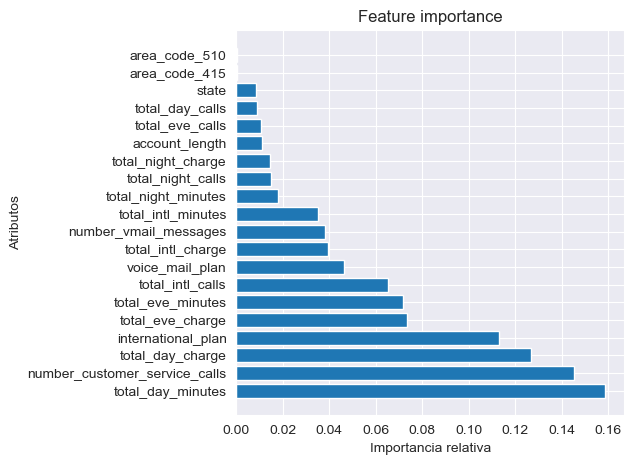

In [24]:
plt.figure(figsize=(5, 5))
plot_importance(best_gradient_boosting, X_train.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

In [25]:
tmp_importance = best_gradient_boosting.feature_importances_
sort_importance = np.argsort(tmp_importance)[::-1]
names = [X_train.columns[i] for i in sort_importance]

top_10_importance = names[:7]
top_10_importance

['total_day_minutes',
 'number_customer_service_calls',
 'total_day_charge',
 'international_plan',
 'total_eve_charge',
 'total_eve_minutes',
 'total_intl_calls']

    De acuerdo al gráfico, los atributos que más notables que aumentan la probabilidad de fuga de clientes son:'total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan', 'total_eve_charge', 'total_eve_minutes' y 'total_intl_calls'

# <span style="color:cyan"> Ejercicio 4: Probabilidad de fuga

In [26]:
# pr que sea 1
gradient_boosting_proba = best_gradient_boosting.predict_proba(X_test)[:, 1]
gradient_boosting_proba

array([1.31910954e-04, 9.99754147e-01, 7.79766975e-05, ...,
       1.37135563e-04, 4.93413589e-03, 9.20174843e-01])

In [27]:
df_states = pd.concat([df_test['state'], pd.DataFrame(gradient_boosting_proba)], axis=1)
df_states = df_states.rename(columns={0: 'pr_1'})

In [28]:
top_3 = df_states.sort_values(by='pr_1', ascending=False)[:3]
top_3

,state,pr_1
1079,14,1.000000
587,15,0.999996
830,34,0.999991


In [29]:
index_states = [j for i, j in top_3['state'].items()]

print('Los tres estados con mayor probabilidad de fuga son: ')
for i in index_states:
    print(df_states_pre[i])

Los tres estados con mayor probabilidad de fuga son: 
IA
NY
OK


### Implemente el modelo predictivo con el archivo churn_test.csv.

In [30]:
# matriz de atributos
X_churn_test = df_test.drop('churn', axis=1)

# vector objetivo
y_churn_test = df_test['churn']

X_train_churn_test, X_test_churn_test, y_train_churn_test, y_test_churn_test = train_test_split(X_churn_test, y_churn_test, test_size=.33, random_state=94)

In [31]:
best_gradient_boosting = gradient_boosting_cv.best_estimator_

churn_test_yhat = best_gradient_boosting.predict(X_test_churn_test)

print(classification_report(y_test_churn_test, churn_test_yhat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       467
           1       0.91      0.76      0.83        84

    accuracy                           0.95       551
   macro avg       0.94      0.87      0.90       551
weighted avg       0.95      0.95      0.95       551

